In [5]:
#Load and Preview the Dataset 

import pandas as pd

# Load dataset
df = pd.read_csv("Walmart_Sales.csv")

# Display first few rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#Data Preprocessing

import numpy as np

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract features from date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Final feature list
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9,4


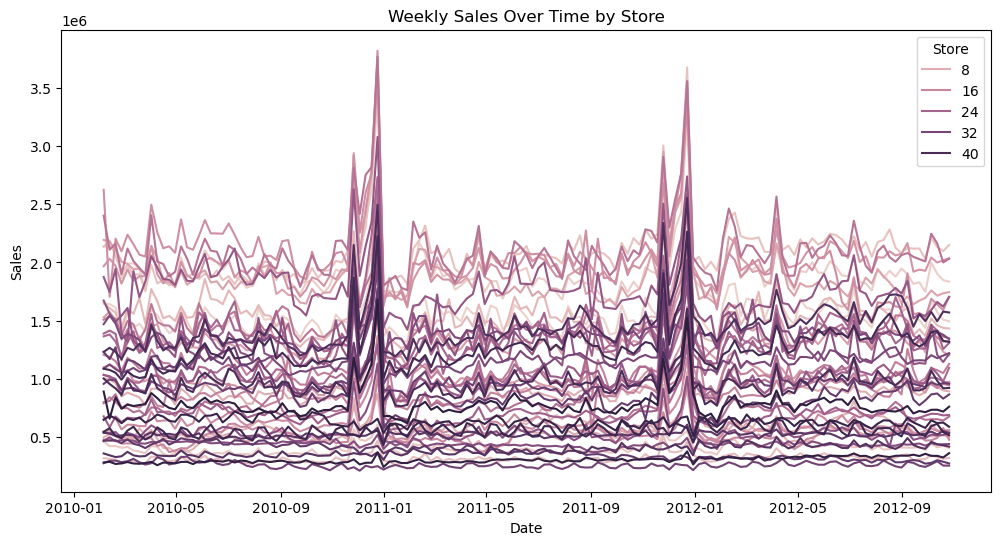

In [7]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', hue='Store')
plt.title("Weekly Sales Over Time by Store")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [8]:
#Feature and Target Selection

features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Month', 'Year', 'Week', 'DayOfWeek']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [9]:
#Train the Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
#Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 558533.16
MAE: 436018.10


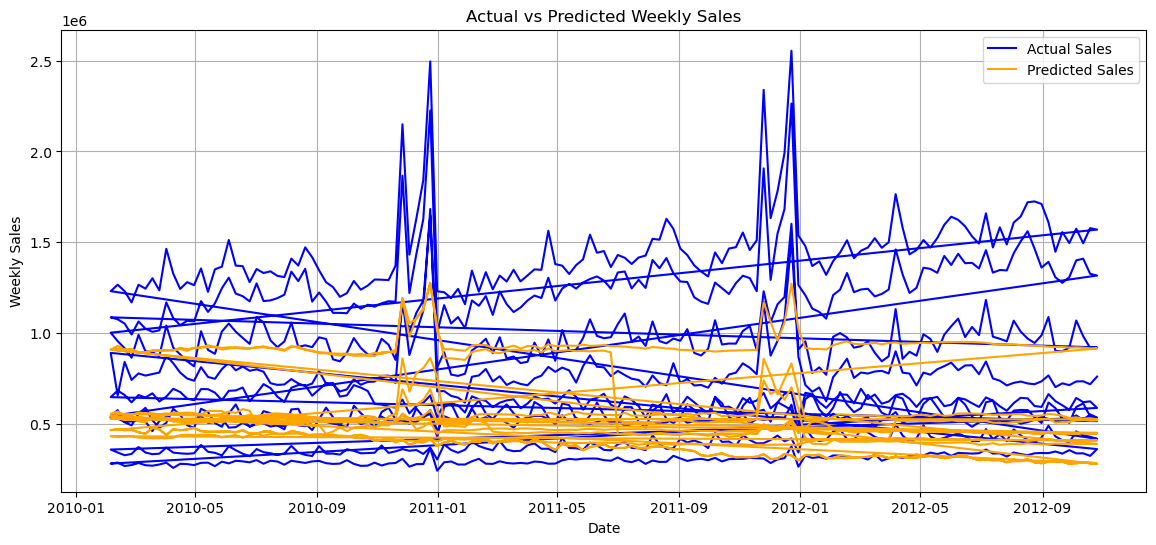

In [11]:
#Visualization

test_dates = df.iloc[y_test.index]['Date']

plt.figure(figsize=(14,6))
plt.plot(test_dates, y_test.values, label='Actual Sales', color='blue')
plt.plot(test_dates, y_pred, label='Predicted Sales', color='orange')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Save The Model

import joblib
joblib.dump(model, 'walmart_sales_forecast.pkl')

['walmart_sales_forecast.pkl']